In [1]:
!pip install opendatasets --quiet

In [2]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_eng Averaged Perceptron Tagger (JSON)
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] averaged_perceptron_tagger_rus Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ 

True

In [3]:
import opendatasets as od

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
od.download('https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ayushisshy
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset


100%|██████████| 211k/211k [00:00<00:00, 42.3MB/s]

In [6]:
import os
os.listdir('./sms-spam-collection-dataset/')
dir='./sms-spam-collection-dataset/'
spam_df=pd.read_csv(dir+'spam.csv',encoding="ISO-8859-1")
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
spam_df=spam_df[["v1","v2"]]
spam_df.rename(columns={'v1':'Lables','v2':'Message'},inplace=True)
spam_df.head(7)

<ipython-input-7-0db7c28c027a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_df.rename(columns={'v1':'Lables','v2':'Message'},inplace=True)


,Lables,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...


In [8]:
spam_df.shape

(5572, 2)

In [9]:
statistics = spam_df.describe()
print(statistics)

       Lables                 Message
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


In [10]:
y=pd.get_dummies(spam_df[['Lables']])
Y=y.iloc[:,1]
print(Y)

0       False
1       False
2        True
3       False
4       False
        ...  
5567     True
5568    False
5569    False
5570    False
5571    False
Name: Lables_spam, Length: 5572, dtype: bool


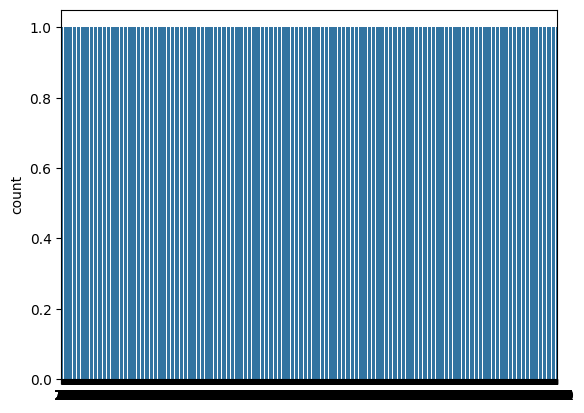

<Figure size 1500x1200 with 0 Axes>

In [11]:
import seaborn as sns
sns.countplot(Y)
plt.figure(figsize=(15,12))
plt.show()

In [12]:
message=spam_df.iloc[:,1]
message

,Message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will Ì_ b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [13]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [14]:
corpus=[]
ps=PorterStemmer()
lem=WordNetLemmatizer()
for i in range(len(message)):
  text=re.sub('[^a-zA-Z]',' ',message[i])
  text=text.lower()
  text=text.split()
  text=[lem.lemmatize(word) for word in text if not word in stopwords.words('english')]
  text=' '.join(text)
  corpus.append(text)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()

In [16]:
X=tf.fit_transform(corpus).toarray()

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.15,shuffle=True)
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB().fit(x_train,y_train)

In [18]:
y_pred=model.predict(x_test)
y_pred

array([False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,

In [19]:
y_pred=model.predict(x_test)
y_pred

array([False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,

In [20]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

In [21]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[727,   1],
       [ 27,  81]])

<Axes: >

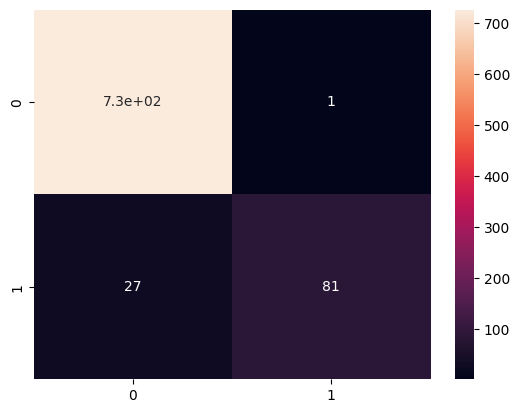

In [22]:
sns.heatmap(cm,annot=True)

In [23]:
acc=accuracy_score(y_test,y_pred)
acc

0.9665071770334929

In [24]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       False       0.96      1.00      0.98       728
        True       0.99      0.75      0.85       108

    accuracy                           0.97       836
   macro avg       0.98      0.87      0.92       836
weighted avg       0.97      0.97      0.96       836



In [25]:
def test(model,message):
    text=re.sub('[^a-zA-Z]',' ',message)
    text=text.lower()
    text=text.split()
    text=[lem.lemmatize(word) for word in text if not word in stopwords.words('english')]
    text=' '.join(text)
    X = tf.transform([text])
    return model.predict(X)

In [26]:
sentence = spam_df.iloc[3]['Message']
sentence = "ACTION REQUIRED. Please verify your Bank of America account information to avoid a hold on your account. Click here to confirm: "

In [27]:
result = "Not Spam" if test(model, sentence)[0] == 0 else "Spam"

In [28]:
result

'Not Spam'

In [29]:
import pickle

In [30]:
pickle.dump(model, open('model.pkl', 'wb'))

In [31]:
pickle.dump(tf, open('tfidf.pkl', 'wb'))